# Efficiency LIANA+

In [1]:
import pandas as pd
import liana as li
import gc

In [2]:
from benchmark import _benchmark, _sample_anndata, _sample_resource

In [3]:
obs_range = [1000, 25000, 100000]

## Single-cell

In [4]:
li.mt.show_methods().sort_values("Method Name")

,Method Name,Magnitude Score,Specificity Score,Reference
0,CellChat,lr_probs,cellchat_pvals,"Jin, S., Guerrero-Juarez, C.F., Zhang, L., Cha..."
0,CellPhoneDB,lr_means,cellphone_pvals,"Efremova, M., Vento-Tormo, M., Teichmann, S.A...."
0,Connectome,expr_prod,scaled_weight,"Raredon, M.S.B., Yang, J., Garritano, J., Wang..."
0,Geometric Mean,lr_gmeans,gmean_pvals,CellPhoneDBv2's permutation approach applied t...
0,NATMI,expr_prod,spec_weight,"Hou, R., Denisenko, E., Ong, H.T., Ramilowski,..."
0,Rank_Aggregate,magnitude_rank,specificity_rank,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,SingleCellSignalR,lrscore,None,"Cabello-Aguilar, S., Alame, M., Kon-Sun-Tack, ..."
0,log2FC,None,lr_logfc,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,scSeqComm,inter_score,None,"Baruzzo, G., Cesaro, G., Di Camillo, B. 2022. ..."


In [5]:
methods = {
    "CellChat": li.mt.cellchat,
    "Connectome": li.mt.connectome,
    "CellPhoneDB": li.mt.cellphonedb,
    "Geometric Mean": li.mt.geometric_mean,
    "NATMI": li.mt.natmi,
    "Rank Aggregate": li.mt.rank_aggregate,
    "SingleCellSignalR": li.mt.singlecellsignalr,
    "log2FC": li.mt.logfc,
    "scSeqComm": li.mt.scseqcomm,
    }

In [6]:
benchmark_stats = pd.DataFrame(columns=["method", "dataset", "time", "memory"])

for n_obs in obs_range:
    print(n_obs)
    adata = _sample_anndata(n_obs=n_obs)
    resource = _sample_resource(adata, n_lrs=2000)
        
    for method in methods.keys():
        for _ in range(5):
            print(method)
            time, memory = _benchmark(function=methods[method],
                                      adata=adata,
                                      resource=resource,
                                      groupby='cell_type',
                                      use_raw=False,
                                      verbose=False,
                                      n_jobs=4
                                      )
            benchmark_stats.loc[len(benchmark_stats)] = [method, n_obs, time, memory]
    benchmark_stats.to_csv("sc_stats.csv", index=False)
    
    gc.collect()

1000
 NNZ fraction: 0.0998465
CellChat
CellChat
CellChat
CellChat
CellChat
Connectome
Connectome
Connectome
Connectome
Connectome
CellPhoneDB
CellPhoneDB
CellPhoneDB
CellPhoneDB
CellPhoneDB
Geometric Mean
Geometric Mean
Geometric Mean
Geometric Mean
Geometric Mean
NATMI
NATMI
NATMI
NATMI
NATMI
Rank Aggregate
Rank Aggregate
Rank Aggregate
Rank Aggregate
Rank Aggregate
SingleCellSignalR
SingleCellSignalR
SingleCellSignalR
SingleCellSignalR
SingleCellSignalR
log2FC
log2FC
log2FC
log2FC
log2FC
scSeqComm
scSeqComm
scSeqComm
scSeqComm
scSeqComm
25000
 NNZ fraction: 0.10006314
CellChat


In [ ]:
import plotnine as p9

/home/dbdimitrov/.local/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


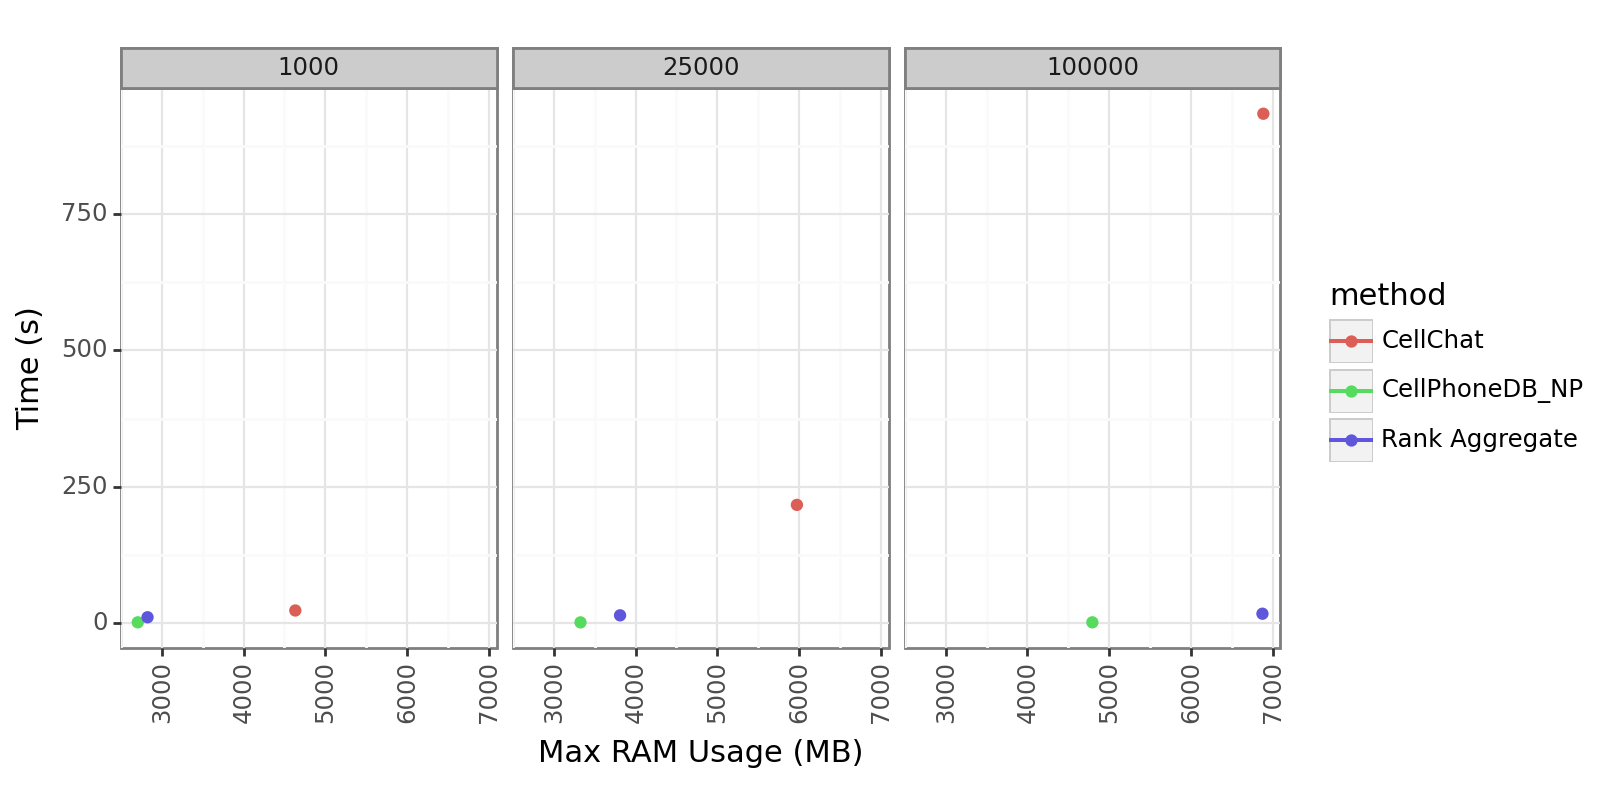

<Figure Size: (800 x 400)>

In [ ]:
(
    p9.ggplot(benchmark_stats, p9.aes(x="memory", y="time", color="method")) + 
    p9.geom_point() +
    p9.geom_line() +
    p9.theme_bw() +
    p9.facet_grid("~ dataset" ) +
    p9.labs(x="Max RAM Usage (MB)", y="Time (s)") +
    # rotate
    p9.theme(axis_text_x = p9.element_text(angle = 90), figure_size=(8, 4))
)

## Local Spatial Scores

In [ ]:
import squidpy as sq
import scanpy as sc
import pandas as pd
from itertools import product

In [ ]:
n_lrs = 500

In [ ]:
function_names = li.mt.bivar.show_functions()['name'].values

In [ ]:
obs_list = [1000, 5000, 10000, 25000, 50000, 100000]

In [ ]:
benchmark_stats = pd.DataFrame(columns=["method", "dataset", "time", "memory"])

for n_obs in obs_list:
    print(n_obs)
    
    if n_obs!=164000:
        adata = _sample_anndata(n_obs=n_obs)
        resource = _sample_resource(adata, n_lrs=n_lrs)
    else:
        adata = sc.read_h5ad("xenium.h5ad")
        resource = adata.uns['resource']
        
    for method in methods:
        print(method)
        if (method=='masked_spearman') and (n_obs>25000):
            continue
        
        for _ in range(5):
            time, memory = _benchmark(function=li.mt.lr_bivar, 
                                      adata=adata, 
                                      function_name=method, 
                                      n_perms=None,
                                      use_raw=False, 
                                      verbose=False,
                                      mask_negatives=False,
                                      resource=resource
                                      )
            benchmark_stats.loc[len(benchmark_stats)] = [method, n_obs, time, memory]
    benchmark_stats.to_csv("sp_stats.csv", index=False)

1000
 NNZ fraction: 0.0998465
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


masked_spearman
5000
 NNZ fraction: 0.0999908
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


masked_spearman
10000
 NNZ fraction: 0.0999469
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


masked_spearman
25000
 NNZ fraction: 0.10006314
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


masked_spearman
50000
 NNZ fraction: 0.10000397
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


masked_spearman
100000
 NNZ fraction: 0.099998885
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

masked_spearman
0
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:275: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

masked_spearman


### Plot Results

In [ ]:
import plotnine as p9

In [ ]:
benchmark_stats = pd.read_csv("sp_stats.csv")

In [ ]:
# Rename functions
name_dict = {'cosine': 'Cosine similarity',
             'jaccard': 'Jaccard index',
             'masked_spearman': 'Masked Spearman',
             'pearson': 'Pearson correlation',
             'morans': 'Moran\'s R',
             'spearman': 'Spearman correlation',
             'product': 'Product',
             'norm_product': 'Normalized product'
             }
benchmark_stats['method'] = benchmark_stats['method'].map(name_dict)
benchmark_stats['method'] = pd.Categorical(benchmark_stats['method'], categories=name_dict.values())

In [ ]:
dataset_dict = { k: f"{int(k/1000)}k" if k!=164000 else "Xenium 164k" for k in obs_list}
benchmark_stats['dataset'] = benchmark_stats['dataset'].astype('category')
benchmark_stats['dataset'] = benchmark_stats['dataset'].replace(dataset_dict).astype('category')
benchmark_stats['dataset'].replace(dataset_dict)

0               1k
1               1k
2               1k
3               1k
4               1k
          ...     
185    Xenium 164k
186    Xenium 164k
187    Xenium 164k
188    Xenium 164k
189    Xenium 164k
Name: dataset, Length: 190, dtype: category
Categories (7, object): ['Xenium 164k', '1k', '5k', '10k', '25k', '50k', '100k']

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


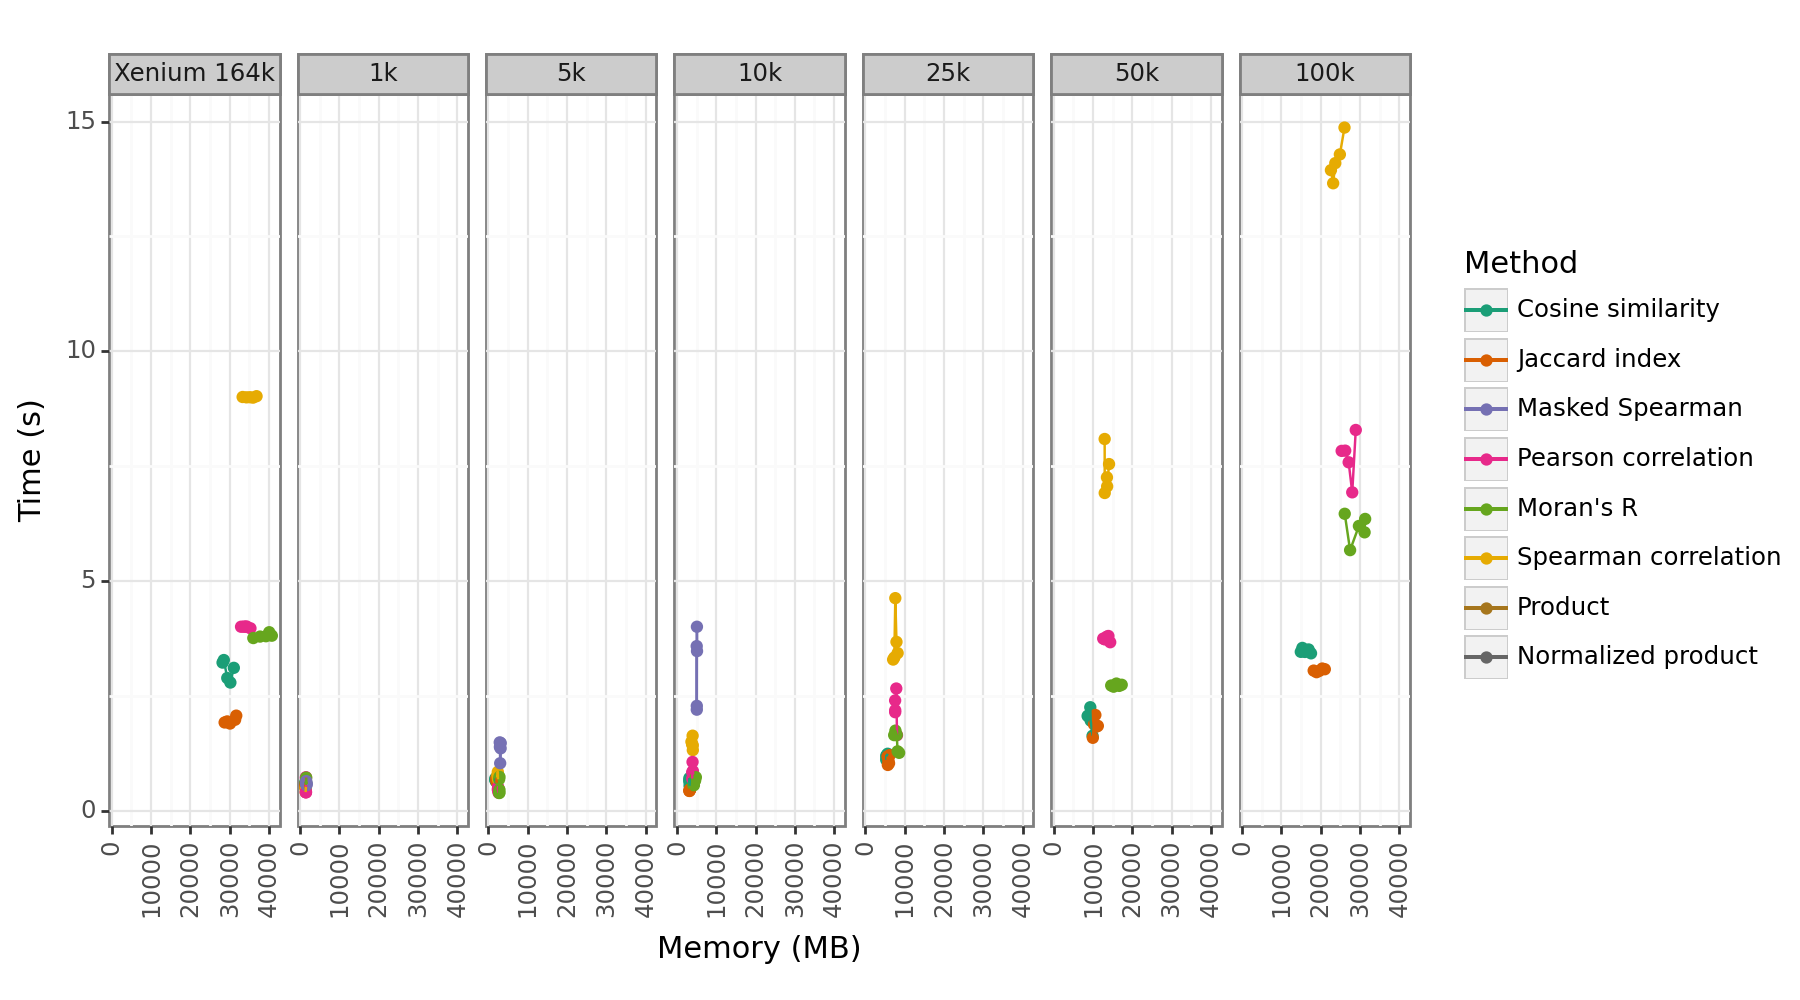

<Figure Size: (900 x 500)>

In [ ]:
(
    p9.ggplot(benchmark_stats, p9.aes(x="memory", y="time", color="method")) + 
    p9.scale_color_brewer(type="qual", palette="Dark2") +
    p9.geom_point() +
    p9.geom_line() +
    p9.theme_bw() +
    p9.facet_grid("~ dataset" ) +
    p9.labs(x="Memory (MB)", y="Time (s)", color="Method") +
    # rotate
    p9.theme(axis_text_x = p9.element_text(angle = 90), figure_size=(9, 5))
)